# BinWaves example in Cantabria (Reconstruction)

**In this notebook**: 
<br><br>
Here waves are reconstructed in a selected grid.
<br><br>
Steps:
- Kp propagation coefficients and hindcast reconstruction is made at a grid.

In [1]:
import xarray as xr

# Load all the gridded kps and reproject

kp_coeffs = xr.open_dataset("outputs/kp_coefficients.nc")
kp_coeffs

<xarray.Dataset> Size: 691MB
Dimensions:   (case_num: 406, site: 286, freq: 31, dir: 24)
Coordinates:
  * case_num  (case_num) int64 3kB 0 1 2 3 4 5 6 ... 399 400 401 402 403 404 405
  * site      (site) int64 2kB 1 2 3 4 5 6 7 8 ... 280 281 282 283 284 285 286
  * freq      (freq) float64 248B 0.03 0.0329 0.0362 ... 0.4145 0.4552 0.5
  * dir       (dir) float64 192B 7.5 22.5 37.5 52.5 ... 307.5 322.5 337.5 352.5
    utm_x     (site) float64 2kB ...
    utm_y     (site) float64 2kB ...
Data variables:
    kps       (case_num, site, freq, dir) float64 691MB ...

In [2]:
import pandas as pd
from utils.operations import transform_ERA5_spectrum

model_parameters = pd.read_csv("CAN_cases/swan_cases.csv").to_dict(orient="list")

# Load interest spectra

offshore_spectra, offshore_spectra_case = transform_ERA5_spectrum(
    era5_spectrum=xr.open_dataset("outputs/ERA5_offshore_spectra.nc"),
    subset_parameters=model_parameters,
    available_case_num=kp_coeffs.case_num.values,
)
offshore_spectra_case

<xarray.DataArray 'efth' (case_num: 406, time: 17520)> Size: 57MB
array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.04577357e-05, 4.08553964e-05, 4.19816247e-05, ...,
        5.65294200e-05, 5.74575032e-05, 6.00530407e-05],
       [2.36402132e-05, 2.40673541e-05, 2.47308005e-05, ...,
        3.69458498e-05, 3.69161785e-05, 3.82645980e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.14144622e-05, 2.12261527e-05, 2.19957586e-05]])
Coordinates:
  * case_num   (case_num) int64 3kB 0 1 2 3 4 5 6 ... 400 401 402 403 404 405
    longitude  float32 4B 356.1
    latitude   float32 4B 43.82
  * time       (time) datetime64[ns] 140kB 2009-01-01 ... 2010-12-31T23:00:00

In [ ]:
from bluemath_tk.waves.binwaves import reconstruc_spectra

# Reconstruct spectra

time_to_reconstruct = "2010-02-20"

reconstructed_onshore_spectra = reconstruc_spectra(
    offshore_spectra=offshore_spectra_case.sel(time=time_to_reconstruct),
    kp_coeffs=kp_coeffs,
)
reconstructed_onshore_spectra

<xarray.Dataset> Size: 41MB
Dimensions:    (site: 286, freq: 31, dir: 24, time: 24)
Coordinates:
  * site       (site) int64 2kB 1 2 3 4 5 6 7 8 ... 280 281 282 283 284 285 286
  * freq       (freq) float64 248B 0.03 0.0329 0.0362 ... 0.4145 0.4552 0.5
  * dir        (dir) float64 192B 7.5 22.5 37.5 52.5 ... 307.5 322.5 337.5 352.5
    utm_x      (site) float64 2kB 4.252e+05 4.262e+05 ... 4.392e+05 4.288e+05
    utm_y      (site) float64 2kB 4.819e+06 4.819e+06 ... 4.801e+06 4.816e+06
    longitude  float32 4B 356.1
    latitude   float32 4B 43.82
  * time       (time) datetime64[ns] 192B 2010-02-20 ... 2010-02-20T23:00:00
Data variables:
    kps        (time, site, freq, dir) float64 41MB 0.0 0.0 ... 2.16e-05

(<Figure size 1500x600 with 2 Axes>, <Axes: xlabel='cx', ylabel='cy'>)

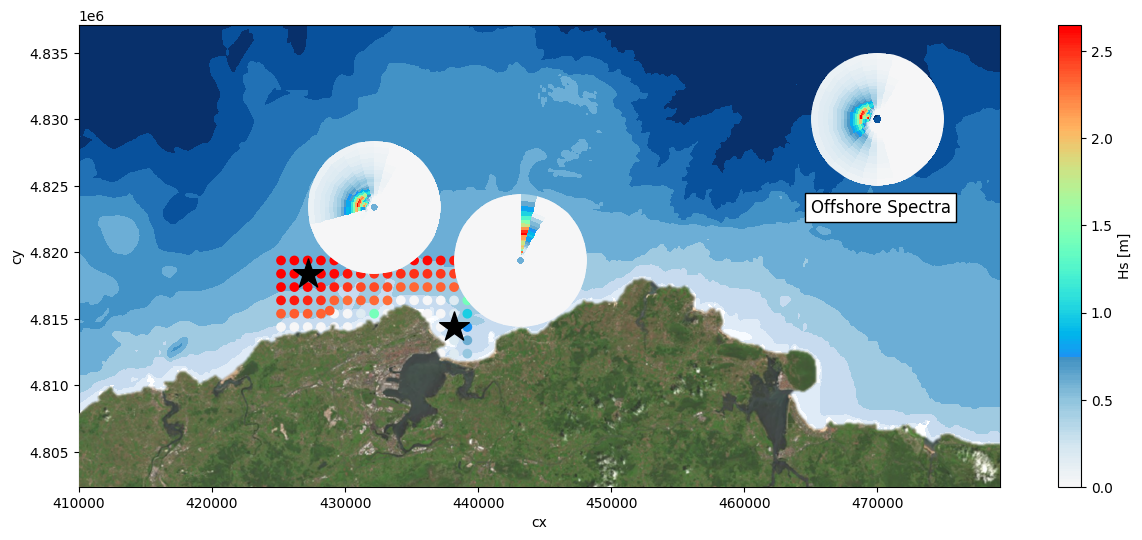

In [5]:
import xarray as xr
import matplotlib.image as mimg
from utils.plotting import plot_spectrum_in_coastline

time_to_plot = "2010-02-20 12:00"

# Plot the spectrum along the coastline
bathy = xr.open_dataset("outputs/bathymetry_100m.nc").elevation.T
ortophoto = mimg.imread("outputs/ortophoto_cantabria.png")
plot_spectrum_in_coastline(
    bathy=bathy,
    reconstructed_onshore_spectra=reconstructed_onshore_spectra.rename({"kps": "kp"}),
    reconstruction_kps=kp_coeffs,
    offshore_spectra=offshore_spectra,
    time_to_plot=time_to_plot,
    sites_for_spectrum=[17, 88],
    ortophoto=ortophoto,
)